In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
ca_videos = pd.read_csv('CAvideos.csv')

In [125]:
ca_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [8]:
CAvideos.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

Посмтрим объем данных

In [17]:
ca_videos.shape

(40840, 16)

Посмотрим на типы колонок

In [18]:
ca_videos.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

Проверим числовые колонки

In [20]:
ca_videos.describe()

,category_id,views,likes,dislikes,comment_count
count,40840.000000,4.084000e+04,4.084000e+04,4.084000e+04,4.084000e+04
mean,20.705828,6.034553e+05,2.187550e+04,1.397136e+03,2.785857e+03
std,6.975813,2.348963e+06,1.018000e+05,1.457738e+04,1.745803e+04
min,1.000000,5.180000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,2.706875e+04,5.330000e+02,2.900000e+01,7.900000e+01
50%,24.000000,1.192770e+05,2.699000e+03,1.340000e+02,3.760000e+02
75%,24.000000,4.431015e+05,1.179625e+04,5.320000e+02,1.376000e+03
max,44.000000,1.138762e+08,4.924056e+06,1.470386e+06,1.084435e+06


Посмотрим на корреляцию между колонками

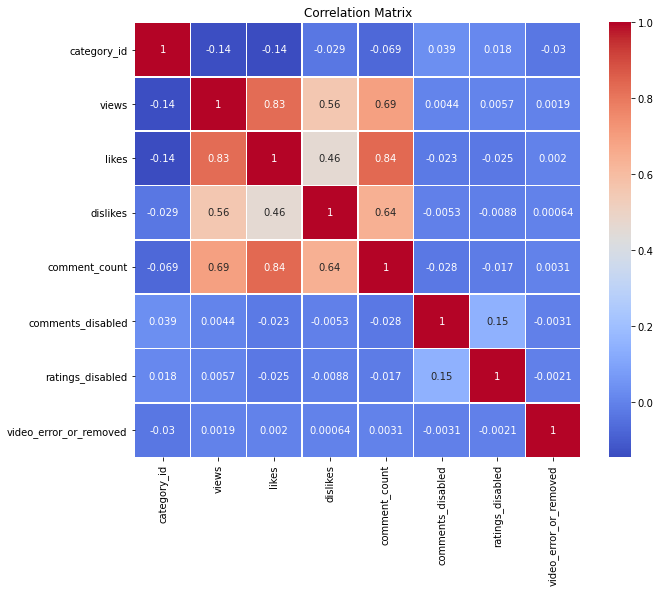

In [25]:
correlation_matrix = ca_videos.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Как и ожидалось высокая корреляция между просмотрами с лайками, дизлайками и комментами

Первый возникающий вопрос, от чего зависит просматриваемость видео. Интуитивно понимаем, что лучше всего проверить category_id,channel_title и может быть publish_time так как аудитория со временем растет 

Начнем с изучения категорий

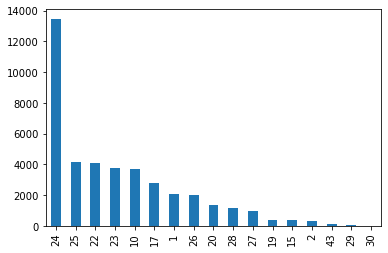

In [28]:
ca_videos['category_id'].value_counts().plot(kind='bar')

In [29]:
ca_videos['category_id'].value_counts()

24    13451
25     4159
22     4105
23     3773
10     3731
17     2787
1      2060
26     2007
20     1344
28     1155
27      991
19      392
15      369
2       353
43      124
29       74
30        6
Name: category_id, dtype: int64

есть 16 категорий видео, для качества анализа оставим только категории в которых есть более 900 видео

In [65]:
videos_by_category= ca_videos.groupby('category_id').agg({'video_id': 'count'})

In [66]:
videos_by_category.reset_index(inplace=True)

In [70]:
popular_catigories = videos_by_category[videos_by_category['video_id']>900]
top_category_ids = popular_catigories['category_id'].tolist()
top_category_ids

[1, 10, 17, 20, 22, 23, 24, 25, 26, 27, 28]

In [94]:
ca_videos_top_categories = ca_videos[ca_videos['category_id'].isin(top_category_ids)]
ca_videos_top_categories
grouped_ca_videos_top_categories = ca_videos_top_categories.groupby('category_id').mean()[['views', 'likes', 'dislikes']]
grouped_ca_videos_top_categories.reset_index(inplace=True)
grouped_ca_videos_top_categories['views'] = grouped_ca_videos_top_categories['views']/1000000
grouped_ca_videos_top_categories.rename(columns={'views': 'views,mln'}, inplace=True)
grouped_ca_videos_top_categories['likes'] = grouped_ca_videos_top_categories['likes']/1000
grouped_ca_videos_top_categories.rename(columns={'likes': 'likes,thousands'}, inplace=True)
grouped_ca_videos_top_categories['dislikes'] = grouped_ca_videos_top_categories['dislikes']/1000
grouped_ca_videos_top_categories.rename(columns={'dislikes': 'dislikes,thousands'}, inplace=True)
grouped_ca_videos_top_categories['likes_rate,%'] = grouped_ca_videos_top_categories['likes,thousands']/grouped_ca_videos_top_categories['views,mln']/10
grouped_ca_videos_top_categories['dislikes_rate,%'] = grouped_ca_videos_top_categories['dislikes,thousands']/grouped_ca_videos_top_categories['views,mln']/10
grouped_ca_videos_top_categories['appreciation'] = grouped_ca_videos_top_categories['likes_rate,%']-grouped_ca_videos_top_categories['dislikes_rate,%']
grouped_ca_videos_top_categories['rank,views'] = grouped_ca_videos_top_categories['views,mln'].rank(method='min').astype(int)
grouped_ca_videos_top_categories['rank,likes'] = grouped_ca_videos_top_categories['likes,thousands'].rank(method='min').astype(int)
grouped_ca_videos_top_categories['rank,likes rate'] = grouped_ca_videos_top_categories['likes_rate,%'].rank(method='min').astype(int)
grouped_ca_videos_top_categories['rank,dislikes'] = grouped_ca_videos_top_categories['dislikes,thousands'].rank(method='min',ascending=False).astype(int)
grouped_ca_videos_top_categories['rank,dislikes rate'] = grouped_ca_videos_top_categories['dislikes_rate,%'].rank(method='min',ascending=False).astype(int)
grouped_ca_videos_top_categories['rank, appreciation'] = grouped_ca_videos_top_categories['appreciation'].rank(method='min').astype(int)
grouped_ca_videos_top_categories['total_rank'] = grouped_ca_videos_top_categories['rank,views']+grouped_ca_videos_top_categories['rank,likes']+grouped_ca_videos_top_categories['rank,likes rate']+grouped_ca_videos_top_categories['rank,dislikes']+grouped_ca_videos_top_categories['rank,dislikes rate']+grouped_ca_videos_top_categories['rank, appreciation']
grouped_ca_videos_top_categories

,category_id,"views,mln","likes,thousands","dislikes,thousands","likes_rate,%","dislikes_rate,%",appreciation,"rank,views","rank,likes","rank,likes rate","rank,dislikes","rank,dislikes rate","rank, appreciation",total_rank
0,1,1.426729,37.767963,1.510320,2.647172,0.105859,2.541313,10,8,3,6,11,3,41
1,10,3.532525,151.285856,5.922860,4.282655,0.167666,4.114989,11,11,10,1,5,10,48
2,17,1.075584,21.330972,1.179178,1.983199,0.109631,1.873568,8,3,1,8,10,2,32
3,20,0.923759,38.487018,1.820597,4.166347,0.197086,3.969262,5,9,9,4,3,9,39
4,22,0.786414,25.673219,2.309573,3.264595,0.293684,2.970911,4,5,7,2,1,6,25
5,23,0.982889,51.960422,1.423937,5.286502,0.144873,5.141629,6,10,11,7,7,11,52
6,24,1.016372,28.789342,1.917447,2.832560,0.188656,2.643904,7,6,4,3,4,4,28
7,25,0.388221,7.863682,0.784814,2.025570,0.202157,1.823413,1,1,2,11,2,1,18
8,26,0.782684,25.502294,0.862242,3.258313,0.110165,3.148148,3,4,6,9,9,7,38
9,27,0.536603,21.162868,0.800654,3.943861,0.149208,3.794653,2,2,8,10,6,8,36


1) Категория 10 с отрывом самая просматриваемая - 3,53 млн просмотров на видео, она и лидирует по лайкам и дизлайкам
2) Категории 1,17,24 и 28 имеют в среднем больше миллиона просмотров
3) Только категория 25 имеет менее 500к просмотров на видео
4) Категория 23 самая лайкабельная(5,28%), недалеко от нее категории 10(4,28%) и 20(4,16%)
5) Наименее лайкабельная категория - 17(1,98%)
6) Больше всего доля дизлайков у категории 22(0,29%), у остальных можно сказать что в пределах 0,2%
7) Разница между лайками и дизлайками наибольшая у категории 23(5,14%), меньше всего у 25-й (1,83%)


In [98]:
grouped_ca_videos_top_categories[['category_id','total_rank']].sort_values(by='total_rank')

,category_id,total_rank
7,25,18
4,22,25
6,24,28
2,17,32
9,27,36
8,26,38
3,20,39
10,28,39
0,1,41
1,10,48


Создал колонки абсолютной позиции категории среди всех категоий по каждому параметру, и суммировал эти ранки чтобы выбрать три лучших канала по всем параметрам. Будем считать что влияние всех параметров одинаковое. По данным критериям лучшие категории- 25,22 и 24

Поизучаем каналы

In [36]:
len(ca_videos['channel_title'].unique())

5076

Всего есть 5076 каналов

Посмотрим сколько видео есть в каждом канале

In [124]:
channel_counts = ca_videos['channel_title'].value_counts()
channel_counts_df = pd.DataFrame({'channel': channel_counts.index, 'videos': channel_counts.values}).sort_values(by='videos',ascending=False)

Узнаем сколько каналов содержат хотя бы 100 видко

In [104]:
сhannels_with_100_more_video = channel_counts_df[channel_counts_df['videos']>=100]
сhannels_with_100_more_video.shape[0]

67

Поизучаем 67 каналов со 100 и больше видео

In [123]:
list_сhannels_with_100_more_video = сhannels_with_100_more_video['channel'].tolist()

In [127]:
ca_videos_top_channels = ca_videos[ca_videos['channel_title'].isin(list_сhannels_with_100_more_video)]
grouped_ca_videos_top_channels = ca_videos_top_channels.groupby('channel_title').mean()[['views', 'likes', 'dislikes']]
grouped_ca_videos_top_channels.reset_index(inplace=True)
grouped_ca_videos_top_channels['views'] = grouped_ca_videos_top_channels['views']/1000000
grouped_ca_videos_top_channels.rename(columns={'views': 'views,mln'}, inplace=True)
grouped_ca_videos_top_channels['likes'] = grouped_ca_videos_top_channels['likes']/1000
grouped_ca_videos_top_channels.rename(columns={'likes': 'likes,thousands'}, inplace=True)
grouped_ca_videos_top_channels['dislikes'] = grouped_ca_videos_top_channels['dislikes']/1000
grouped_ca_videos_top_channels.rename(columns={'dislikes': 'dislikes,thousands'}, inplace=True)
grouped_ca_videos_top_channels['likes_rate,%'] = grouped_ca_videos_top_channels['likes,thousands']/grouped_ca_videos_top_channels['views,mln']/10
grouped_ca_videos_top_channels['dislikes_rate,%'] = grouped_ca_videos_top_channels['dislikes,thousands']/grouped_ca_videos_top_channels['views,mln']/10
grouped_ca_videos_top_channels['appreciation'] = grouped_ca_videos_top_channels['likes_rate,%']-grouped_ca_videos_top_channels['dislikes_rate,%']
grouped_ca_videos_top_channels.sort_values(by='views,mln',ascending=False).head(5)

,channel_title,"views,mln","likes,thousands","dislikes,thousands","likes_rate,%","dislikes_rate,%",appreciation
35,PewDiePie,4.014787,292.147226,7.845530,7.276780,0.195416,7.081364
47,Speed Records,3.709608,106.422530,4.999826,2.868835,0.134780,2.734054
32,MLG Highlights,2.119320,9.566394,5.484176,0.451390,0.258771,0.192619
52,The Late Late Show with James Corden,2.051301,60.688168,2.307215,2.958520,0.112476,2.846045
5,BuzzFeedVideo,2.005143,49.235500,2.191937,2.455461,0.109316,2.346145


5 каналов с наибольшим средним кол-вом просмотров на видео

In [122]:
grouped_ca_videos_top_channels.sort_values(by='likes,thousands',ascending=False).head(5)

,channel_title,"views,mln","likes,thousands","dislikes,thousands"
35,PewDiePie,4.014787,292.147226,7.845530
47,Speed Records,3.709608,106.422530,4.999826
15,Dr Nozman,1.067981,75.994760,0.900519
16,DramaAlert,1.446383,73.553059,4.504673
36,Philip DeFranco,1.247239,62.628048,1.701796


5 каналов с наибольшим средним кол-вом лайков на видео

In [129]:
grouped_ca_videos_top_channels.sort_values(by='likes_rate,%',ascending=False).head(5)

,channel_title,"views,mln","likes,thousands","dislikes,thousands","likes_rate,%","dislikes_rate,%",appreciation
35,PewDiePie,4.014787,292.147226,7.845530,7.276780,0.195416,7.081364
15,Dr Nozman,1.067981,75.994760,0.900519,7.115740,0.084320,7.031420
11,Cow Chop,0.189577,12.473450,0.147158,6.579614,0.077624,6.501989
23,GameGrumps,0.329828,20.365911,0.166644,6.174702,0.050524,6.124177
16,DramaAlert,1.446383,73.553059,4.504673,5.085311,0.311444,4.773867


5 лучших каналов по проценту лайков

In [130]:
grouped_ca_videos_top_channels.sort_values(by='dislikes_rate,%',ascending=True).head(5)

,channel_title,"views,mln","likes,thousands","dislikes,thousands","likes_rate,%","dislikes_rate,%",appreciation
40,Rapid Highlights,0.394876,1.430925,0.109991,0.362373,0.027854,0.334519
28,Kitchen Nightmares,0.698014,10.687024,0.207228,1.531062,0.029688,1.501373
54,The Real Daytime,0.083844,1.325444,0.027632,1.580843,0.032956,1.547887
0,ABS-CBN Entertainment,0.444265,4.962555,0.163036,1.117026,0.036698,1.080328
65,大劇獨播,0.103089,0.130983,0.038216,0.127058,0.037071,0.089988


5 лучших каналов по проценту дизлайков(чем меньше тем лучше)

In [132]:
grouped_ca_videos_top_channels.sort_values(by='appreciation',ascending=False).head(5)

,channel_title,"views,mln","likes,thousands","dislikes,thousands","likes_rate,%","dislikes_rate,%",appreciation
35,PewDiePie,4.014787,292.147226,7.845530,7.276780,0.195416,7.081364
15,Dr Nozman,1.067981,75.994760,0.900519,7.115740,0.084320,7.031420
11,Cow Chop,0.189577,12.473450,0.147158,6.579614,0.077624,6.501989
23,GameGrumps,0.329828,20.365911,0.166644,6.174702,0.050524,6.124177
36,Philip DeFranco,1.247239,62.628048,1.701796,5.021334,0.136445,4.884889


 5 лучших каналов по разнице лайков и дизлайков. Заметим, что 4 из 5 каналов входят в топ-5 и по проценту лайков. Большой процент лайков более вероятно приведет в топ по разнице. Это потому что люди чаще лайкают чем дизлайкают. 

Гипотеза -1. На просматриваемость канала влияет количество видео в канале. Так как чаще рекомендует одно видео при просмотре другого с того же канала. Давайте проверим.

In [133]:
ca_videos_top_channels.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...


In [141]:
channels_views_and_videos = ca_videos_top_channels.groupby('channel_title').agg({'views': 'mean', 'video_id': 'count'})
channels_views_and_videos.reset_index(inplace = True)
channels_views_and_videos.rename(columns={'views': 'mean_views'}, inplace=True)
channels_views_and_videos.rename(columns={'video_id': 'number_videos'}, inplace=True)
channels_views_and_videos.head()

,channel_title,mean_views,number_videos
0,ABS-CBN Entertainment,4.442650e+05,110
1,ARY Digital,3.694249e+05,168
2,Binging with Babish,9.104847e+05,115
3,Breakfast Club Power 105.1 FM,7.476652e+05,149
4,BuzzFeedBlue,1.197950e+06,143


In [143]:
correlation = channels_views_and_videos['mean_views'].corr(channels_views_and_videos['number_videos'])
correlation

-0.07797796304490455

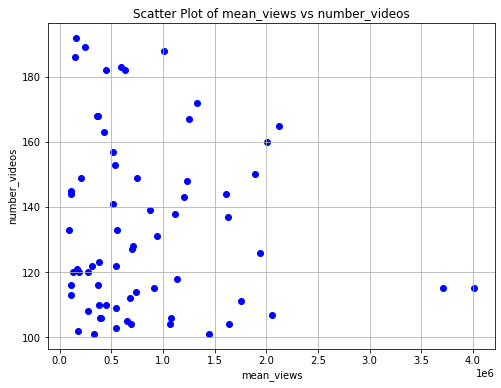

In [145]:
plt.figure(figsize=(8, 6))
plt.scatter(channels_views_and_videos['mean_views'], channels_views_and_videos['number_videos'], color='blue')
plt.title('Scatter Plot of mean_views vs number_videos')
plt.xlabel('mean_views')
plt.ylabel('number_videos')
plt.grid(True)
plt.show()

Как видим, гипотеза не подтвердилась даже близко. Но тут мы может увидеть интересную вещь - есть два явно выделяющихся канала с выскоим значением средних просмторов и низким количеством видео. Из таблицы топ-5 по средним просмотрам видем, что это каналы PewDiePie и Speed Records. Назовем эти каналы качественными

Может попробуем обратную гипотезу, чем меньше видео, тем больше средних просмотров, так как меньшим количеством повышается качество видео

In [147]:
channels_views_and_videos['number_videos_reciprocal'] = 1/channels_views_and_videos['number_videos']
channels_views_and_videos.head(3)

,channel_title,mean_views,number_videos,number_videos_reciprocal
0,ABS-CBN Entertainment,444264.954545,110,0.009091
1,ARY Digital,369424.940476,168,0.005952
2,Binging with Babish,910484.721739,115,0.008696


In [148]:
correlation = channels_views_and_videos['mean_views'].corr(channels_views_and_videos['number_videos_reciprocal'])
correlation

0.06221873392533204

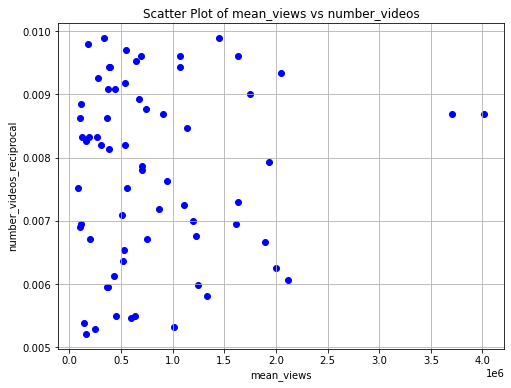

In [151]:
plt.figure(figsize=(8, 6))
plt.scatter(channels_views_and_videos['mean_views'], channels_views_and_videos['number_videos_reciprocal'], color='blue')
plt.title('Scatter Plot of mean_views vs number_videos')
plt.xlabel('mean_views')
plt.ylabel('number_videos_reciprocal')
plt.grid(True)
plt.show()

Так же неверная гипотеза, в принципе это было понятно и по первому скаттерплоту. Может пробовать не другую функцию?

Давайте поизучаем в скольких и каких категориях видео представлены каналы. Оставим только каналы  со 100 и больше видео

In [156]:
ca_videos_top_channels.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...
11,U3xLOo-CNwo,17.14.11,12 Weird Ways To Sneak Food Into Class / Back ...,Troom Troom,26,2017-11-12T15:00:05.000Z,"sneak food|""how to sneak food into class""|""cla...",3153224,28451,2285,3312,https://i.ytimg.com/vi/U3xLOo-CNwo/default.jpg,False,False,False,Subscribe Here: http://bit.ly/2uaz0on\n12 Hot ...
12,FyZMnhUtLfE,17.14.11,猎场 | Game Of Hunting 12【TV版】（胡歌、張嘉譯、祖峰等主演）,大劇獨播,1,2017-11-12T16:00:01.000Z,"電視劇|""大陸電視劇""|""猎场""|""职场""|""商战""|""爱情""|""都市""|""胡歌""|""陈龙""...",158815,218,30,186,https://i.ytimg.com/vi/FyZMnhUtLfE/default.jpg,False,False,False,Thanks for watching the drama! Help more peopl...


In [160]:
channels_in_categories = ca_videos_top_channels.groupby('channel_title').agg({'category_id': 'nunique', 'views': 'mean'})

In [161]:
channels_in_categories.reset_index(inplace=True)

In [162]:
channels_in_categories

,channel_title,category_id,views
0,ABS-CBN Entertainment,1,4.442650e+05
1,ARY Digital,1,3.694249e+05
2,Binging with Babish,1,9.104847e+05
3,Breakfast Club Power 105.1 FM,1,7.476652e+05
4,BuzzFeedBlue,1,1.197950e+06
...,...,...,...
62,Vox,1,5.530558e+05
63,WWE,1,1.750773e+06
64,secureteam10,1,3.676837e+05
65,大劇獨播,1,1.030886e+05


In [163]:
channels_in_categories['category_id'].value_counts()

1    49
2    15
3     2
8     1
Name: category_id, dtype: int64

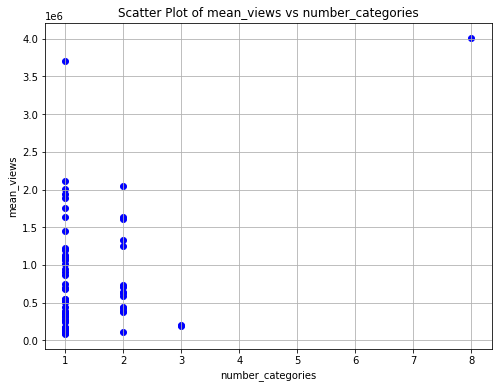

In [167]:
plt.figure(figsize=(8, 6))
plt.scatter(channels_in_categories['category_id'], channels_in_categories['views'], color='blue')
plt.title('Scatter Plot of mean_views vs number_categories')
plt.xlabel('number_categories')
plt.ylabel('mean_views')
plt.grid(True)
plt.show()

В основном все каналы представлены в 1 или 2 категориях, и на успешность канала приверженность одной категории не влияет

In [196]:
CAvideos['publish_time'] = pd.to_datetime(CAvideos['publish_time'])
CAvideos['year'] = CAvideos['publish_time'].dt.year
CAvideos['month'] = CAvideos['publish_time'].dt.month

In [202]:
CAvideos_2017 = CAvideos[CAvideos['year']==2017]

In [203]:
CAvideos_2017_by_month = CAvideos_2017.groupby('month').agg({'category_id': 'count', 'views': 'mean'})
CAvideos_2017_by_month.reset_index(inplace=True)
CAvideos_2017_by_month

,month,category_id,views
0,4,4,1.917065e+05
1,5,2,4.722605e+05
2,8,5,2.493464e+05
3,9,11,6.837607e+05
4,10,6,3.647794e+06
5,11,3755,1.277305e+06
6,12,6117,1.208922e+06


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Дата'], df['Значение'], marker='o')
plt.title('Линейная диаграмма по двум колонкам')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.grid(True)
plt.show()

Оставим только 2017 и 2018

In [194]:
videos_by_year.reset_index(inplace=True)

In [195]:
videos_by_year

,year,category_id,views
0,2017,9900,1.234709e+06
1,2018,30936,1.120233e+06
